In [114]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("xg90_data.csv")

df

,Team,xG,xGA,xG.1,xGA.1,xGD,xGD/90
0,Liverpool,84.07+4.07,33.00+1.00,84.0,33.0,51.0,1.50
1,Arsenal,65.76+2.76,32.97+3.97,65.7,32.9,32.8,0.96
2,Newcastle United,64.77-0.23,50.41+6.41,64.7,50.4,14.3,0.42
3,Manchester City,66.62+0.62,48.96+5.96,66.6,48.9,17.7,0.52
4,Chelsea,66.35+7.35,49.25+9.25,66.3,49.2,17.1,0.50
...,...,...,...,...,...,...,...
1049,Lorient,41.04-2.96,52.50+2.50,41.0,52.5,-11.5,-0.30
1050,Toulouse,40.67-2.33,45.67-18.33,40.6,45.6,-5.0,-0.13
1051,Evian Thonon Gaillard,33.90-7.10,54.61-7.39,33.9,54.6,-20.7,-0.54
1052,Metz,37.52+6.52,48.69-12.31,37.5,48.6,-11.1,-0.29


In [115]:
conversion_factor = df["xGD/90"] / df["xGD"]

df["xG/90"] = df["xG.1"].astype(float) * conversion_factor
df["xGA/90"] = df["xGA.1"].astype(float) * conversion_factor

In [116]:
df.sort_values(by="xGA/90", ascending=False)

df = df[df["xGD/90"] != 0]
df = df[df["xG/90"] < 2.5]

Mean: 1.3740
Std: 0.3689


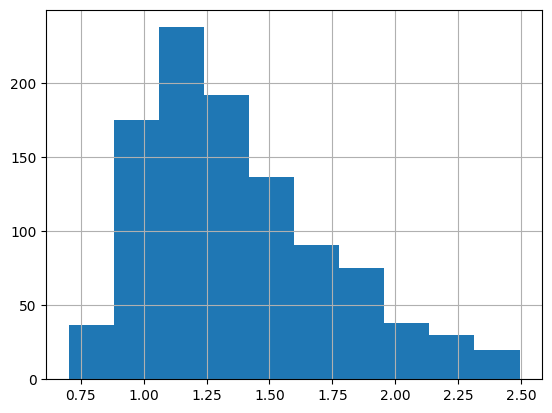

In [117]:
mean = df["xG/90"].mean()
std = df["xG/90"].std()

df["xG/90"].hist();
print(f"Mean: {mean:.4f}")
print(f"Std: {std:.4f}")

Mean: 1.3948
Std: 0.3139


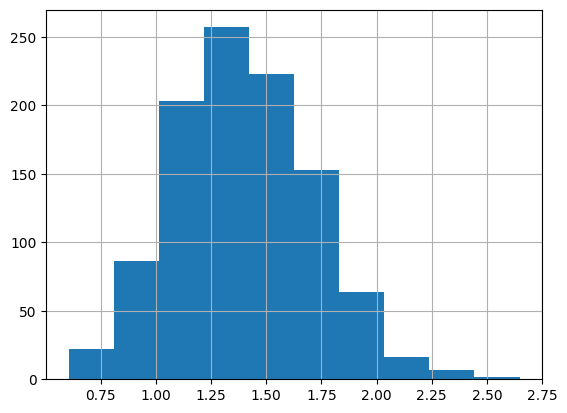

In [118]:
mean = df["xGA/90"].mean()
std = df["xGA/90"].std()

df["xGA/90"].hist();
print(f"Mean: {mean:.4f}")
print(f"Std: {std:.4f}")

Normal distribution parameters: mean=1.3740, std=0.3687
Skewed normal parameters: a=6.0166, loc=0.9087, scale=0.5937


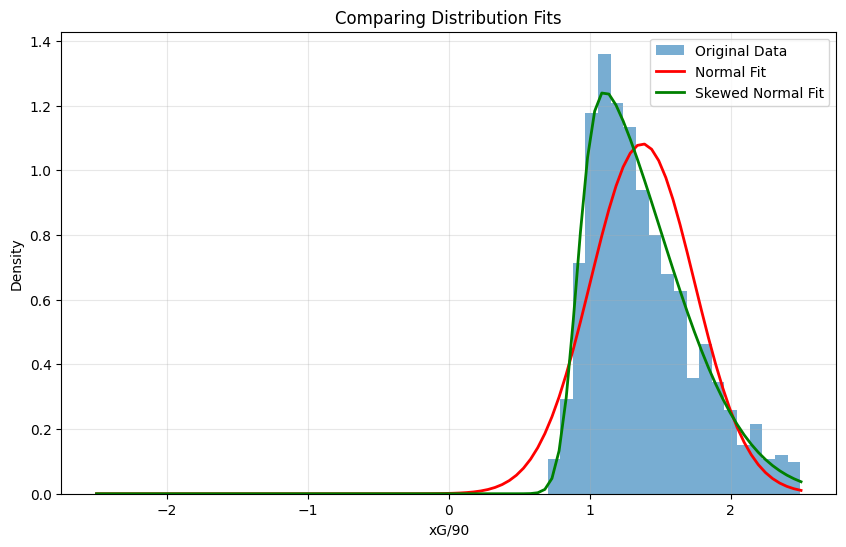

Normal distribution KS test: statistic=0.0927, p-value=0.0000
Skewed normal KS test: statistic=0.0230, p-value=0.6385
Normal distribution AIC: 874.3470
Skewed normal AIC: 671.7751


In [119]:
import matplotlib.pyplot as plt
from scipy.stats import skewnorm, norm
import numpy as np

# Range of x values for plotting
x = np.linspace(-2.5, 2.5, 100)

# Fit a normal distribution
norm_params = norm.fit(df["xG/90"])
norm_pdf = norm.pdf(x, *norm_params)

# Fit a skewed normal distribution
skew_params_xg = skewnorm.fit(df["xG/90"])
skew_pdf = skewnorm.pdf(x, *skew_params_xg)

# Print the parameters
print(f"Normal distribution parameters: mean={norm_params[0]:.4f}, std={norm_params[1]:.4f}")
print(f"Skewed normal parameters: a={skew_params_xg[0]:.4f}, loc={skew_params_xg[1]:.4f}, scale={skew_params_xg[2]:.4f}")

# Plot the distributions against the histogram
plt.figure(figsize=(10, 6))

# Plot histogram of original data
plt.hist(df["xG/90"], bins=20, density=True, alpha=0.6, label='Original Data')

# Plot fitted distributions
plt.plot(x, norm_pdf, 'r-', lw=2, label=f'Normal Fit')
plt.plot(x, skew_pdf, 'g-', lw=2, label=f'Skewed Normal Fit')

plt.xlabel('xG/90')
plt.ylabel('Density')
plt.title('Comparing Distribution Fits')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

# Calculate goodness-of-fit metrics
from scipy.stats import kstest

# Kolmogorov-Smirnov test
ks_norm = kstest(df["xG/90"], 'norm', args=norm_params)
ks_skew = kstest(df["xG/90"], 'skewnorm', args=skew_params_xg)

print(f"Normal distribution KS test: statistic={ks_norm.statistic:.4f}, p-value={ks_norm.pvalue:.4f}")
print(f"Skewed normal KS test: statistic={ks_skew.statistic:.4f}, p-value={ks_skew.pvalue:.4f}")

# AIC calculation (lower is better)
def calc_aic(params, log_likelihood):
    k = len(params)
    return 2 * k - 2 * log_likelihood

# Log-likelihood for normal
ll_norm = np.sum(norm.logpdf(df["xG/90"], *norm_params))
# Log-likelihood for skewed normal
ll_skew = np.sum(skewnorm.logpdf(df["xG/90"], *skew_params_xg))

aic_norm = calc_aic(norm_params, ll_norm)
aic_skew = calc_aic(skew_params_xg, ll_skew)

print(f"Normal distribution AIC: {aic_norm:.4f}")
print(f"Skewed normal AIC: {aic_skew:.4f}")

Normal distribution parameters: mean=1.3948, std=0.3137
Skewed normal parameters: a=1.3800, loc=1.1291, scale=0.4111


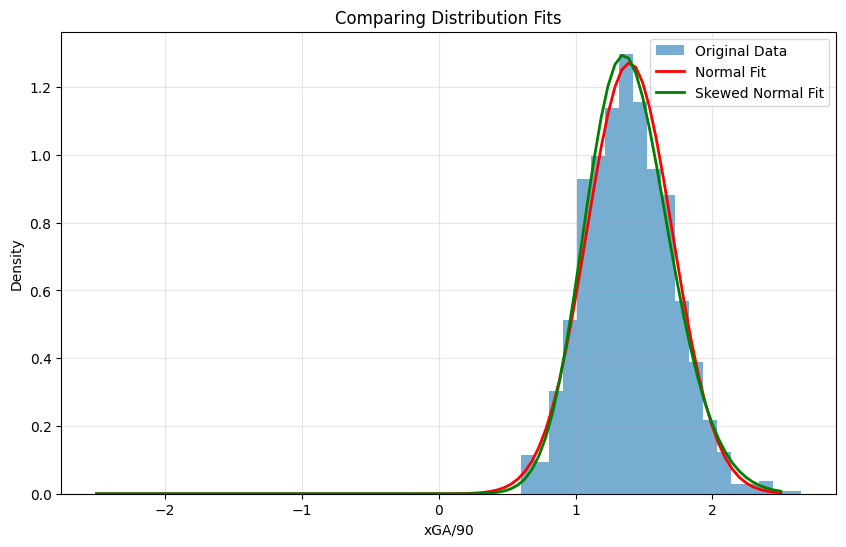

Normal distribution KS test: statistic=0.0260, p-value=0.4819
Skewed normal KS test: statistic=0.0146, p-value=0.9787
Normal distribution AIC: 540.6820
Skewed normal AIC: 531.0255


In [120]:
import matplotlib.pyplot as plt
from scipy.stats import skewnorm, norm
import numpy as np

# Range of x values for plotting
x = np.linspace(-2.5, 2.5, 100)

# Fit a normal distribution
norm_params = norm.fit(df["xGA/90"])
norm_pdf = norm.pdf(x, *norm_params)

# Fit a skewed normal distribution
skew_params_xga = skewnorm.fit(df["xGA/90"])
skew_pdf = skewnorm.pdf(x, *skew_params_xga)

# Print the parameters
print(f"Normal distribution parameters: mean={norm_params[0]:.4f}, std={norm_params[1]:.4f}")
print(f"Skewed normal parameters: a={skew_params_xga[0]:.4f}, loc={skew_params_xga[1]:.4f}, scale={skew_params_xga[2]:.4f}")

# Plot the distributions against the histogram
plt.figure(figsize=(10, 6))

# Plot histogram of original data
plt.hist(df["xGA/90"], bins=20, density=True, alpha=0.6, label='Original Data')

# Plot fitted distributions
plt.plot(x, norm_pdf, 'r-', lw=2, label=f'Normal Fit')
plt.plot(x, skew_pdf, 'g-', lw=2, label=f'Skewed Normal Fit')

plt.xlabel('xGA/90')
plt.ylabel('Density')
plt.title('Comparing Distribution Fits')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

# Calculate goodness-of-fit metrics
from scipy.stats import kstest

# Kolmogorov-Smirnov test
ks_norm = kstest(df["xGA/90"], 'norm', args=norm_params)
ks_skew = kstest(df["xGA/90"], 'skewnorm', args=skew_params_xga)

print(f"Normal distribution KS test: statistic={ks_norm.statistic:.4f}, p-value={ks_norm.pvalue:.4f}")
print(f"Skewed normal KS test: statistic={ks_skew.statistic:.4f}, p-value={ks_skew.pvalue:.4f}")

# AIC calculation (lower is better)
def calc_aic(params, log_likelihood):
    k = len(params)
    return 2 * k - 2 * log_likelihood

# Log-likelihood for normal
ll_norm = np.sum(norm.logpdf(df["xGA/90"], *norm_params))
# Log-likelihood for skewed normal
ll_skew = np.sum(skewnorm.logpdf(df["xGA/90"], *skew_params_xga))

aic_norm = calc_aic(norm_params, ll_norm)
aic_skew = calc_aic(skew_params_xga, ll_skew)

print(f"Normal distribution AIC: {aic_norm:.4f}")
print(f"Skewed normal AIC: {aic_skew:.4f}")

Normal distribution parameters: mean=-0.0207, std=0.5821
Skewed normal parameters: a=2.6029, loc=-0.6712, scale=0.8729


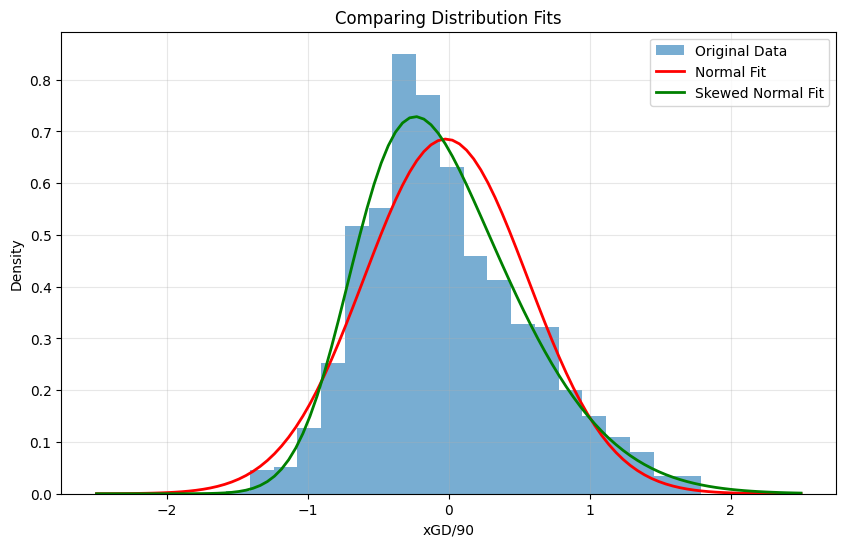

Normal distribution KS test: statistic=0.0794, p-value=0.0000
Skewed normal KS test: statistic=0.0334, p-value=0.1940
Normal distribution AIC: 1817.4485
Skewed normal AIC: 1757.9973


In [121]:
import matplotlib.pyplot as plt
from scipy.stats import skewnorm, norm
import numpy as np

# Range of x values for plotting
x = np.linspace(-2.5, 2.5, 100)

# Fit a normal distribution
norm_params = norm.fit(df["xGD/90"])
norm_pdf = norm.pdf(x, *norm_params)

# Fit a skewed normal distribution
skew_params_xGD = skewnorm.fit(df["xGD/90"])
skew_pdf = skewnorm.pdf(x, *skew_params_xGD)

# Print the parameters
print(f"Normal distribution parameters: mean={norm_params[0]:.4f}, std={norm_params[1]:.4f}")
print(f"Skewed normal parameters: a={skew_params_xGD[0]:.4f}, loc={skew_params_xGD[1]:.4f}, scale={skew_params_xGD[2]:.4f}")

# Plot the distributions against the histogram
plt.figure(figsize=(10, 6))

# Plot histogram of original data
plt.hist(df["xGD/90"], bins=20, density=True, alpha=0.6, label='Original Data')

# Plot fitted distributions
plt.plot(x, norm_pdf, 'r-', lw=2, label=f'Normal Fit')
plt.plot(x, skew_pdf, 'g-', lw=2, label=f'Skewed Normal Fit')

plt.xlabel('xGD/90')
plt.ylabel('Density')
plt.title('Comparing Distribution Fits')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

# Calculate goodness-of-fit metrics
from scipy.stats import kstest

# Kolmogorov-Smirnov test
ks_norm = kstest(df["xGD/90"], 'norm', args=norm_params)
ks_skew = kstest(df["xGD/90"], 'skewnorm', args=skew_params_xGD)

print(f"Normal distribution KS test: statistic={ks_norm.statistic:.4f}, p-value={ks_norm.pvalue:.4f}")
print(f"Skewed normal KS test: statistic={ks_skew.statistic:.4f}, p-value={ks_skew.pvalue:.4f}")

# AIC calculation (lower is better)
def calc_aic(params, log_likelihood):
    k = len(params)
    return 2 * k - 2 * log_likelihood

# Log-likelihood for normal
ll_norm = np.sum(norm.logpdf(df["xGD/90"], *norm_params))
# Log-likelihood for skewed normal
ll_skew = np.sum(skewnorm.logpdf(df["xGD/90"], *skew_params_xGD))

aic_norm = calc_aic(norm_params, ll_norm)
aic_skew = calc_aic(skew_params_xGD, ll_skew)

print(f"Normal distribution AIC: {aic_norm:.4f}")
print(f"Skewed normal AIC: {aic_skew:.4f}")

In [122]:
np.random.seed(0)

# Your skew parameters for each distribution
a_xg = skew_params_xg[0]
loc_xg = skew_params_xg[1]
scale_xg = skew_params_xg[2]

a_xga = skew_params_xga[0]
loc_xga = skew_params_xga[1]
scale_xga = skew_params_xga[2]

a_xgd = skew_params_xGD[0]
loc_xgd = skew_params_xGD[1]
scale_xgd = skew_params_xGD[2]

def generate_correlated_samples(n_samples=20):
    # Method 1: Generate xGD/90 first, then derive others
    xgd90 = skewnorm.rvs(a=a_xgd, loc=loc_xgd, scale=scale_xgd, size=n_samples)
    
    # Generate base xG/90 from its distribution
    xg90_base = skewnorm.rvs(a=a_xg, loc=loc_xg, scale=scale_xg, size=n_samples)
    
    # Generate base xGA/90 from its distribution
    xga90_base = skewnorm.rvs(a=a_xga, loc=loc_xga, scale=scale_xga, size=n_samples)
    
    # Calculate the base difference
    base_diff = xg90_base - xga90_base
    
    # Adjust to match the target xGD/90
    # This preserves the overall shape of the distributions while ensuring xGD/90 = xG/90 - xGA/90
    adjustment = xgd90 - base_diff
    
    # Split the adjustment between xG and xGA
    # You can modify these weights to control how much each side gets adjusted
    xg_weight = 0.5
    xga_weight = 0.5
    
    # Apply adjustments
    xg90 = xg90_base + adjustment * xg_weight
    xga90 = xga90_base - adjustment * xga_weight
    
    # Verify that xGD/90 = xG/90 - xGA/90
    calculated_xgd90 = xg90 - xga90
    
    # Create DataFrame with results
    result_df = pd.DataFrame({
        'xG/90': xg90,
        'xGA/90': xga90,
        'xGD/90': calculated_xgd90,
        'target_xGD/90': xgd90
    })
    
    # Sort by xGD/90
    result_df = result_df.sort_values(by='xGD/90', ascending=False).reset_index(drop=True)
    
    return result_df

# Generate samples
correlated_samples = generate_correlated_samples(n_samples=20)
print(correlated_samples)

# Verify the correlation between variables
print("\nCorrelations:")
print(f"Correlation between xG/90 and xGA/90: {correlated_samples['xG/90'].corr(correlated_samples['xGA/90']):.4f}")
print(f"Correlation between xG/90 and xGD/90: {correlated_samples['xG/90'].corr(correlated_samples['xGD/90']):.4f}")
print(f"Correlation between xGA/90 and xGD/90: {correlated_samples['xGA/90'].corr(correlated_samples['xGD/90']):.4f}")

       xG/90    xGA/90    xGD/90  target_xGD/90
0   2.046268  0.485218  1.561051       1.561051
1   1.577674  0.646346  0.931328       0.931328
2   2.106106  1.183731  0.922376       0.922376
3   1.767307  1.135172  0.632135       0.632135
4   2.006922  1.426551  0.580371       0.580371
5   1.680849  1.283964  0.396884       0.396884
6   1.494420  1.371100  0.123320       0.123320
7   1.360215  1.240868  0.119347       0.119347
8   1.670053  1.552799  0.117254       0.117254
9   1.308974  1.342017 -0.033043      -0.033043
10  1.369342  1.509896 -0.140554      -0.140554
11  0.879315  1.208350 -0.329035      -0.329035
12  1.150207  1.500603 -0.350396      -0.350396
13  0.825344  1.243814 -0.418470      -0.418470
14  1.144559  1.633859 -0.489300      -0.489300
15  0.834832  1.340182 -0.505351      -0.505351
16  1.046323  1.583707 -0.537384      -0.537384
17  0.917640  1.798102 -0.880463      -0.880463
18  0.948483  2.015440 -1.066957      -1.066957
19  1.221584  2.413753 -1.192169      -1

In [123]:
def normalize_team_ratings(team_data):
    # Create a copy of the data
    normalized_data = team_data.copy()
    
    # Calculate league averages
    avg_xg90 = team_data['xG/90'].mean()
    avg_xga90 = team_data['xGA/90'].mean()
    
    # Normalize ratings (divide by league average)
    normalized_data['attack_strength'] = team_data['xG/90'] / avg_xg90
    normalized_data['defense_strength'] = avg_xga90 / team_data['xGA/90']  # Inverted so higher is better
    
    return normalized_data

def simulate_match(home_idx, away_idx, team_data, home_advantage=0.3):
    # Get team strengths directly from xG values
    home_xg = team_data.iloc[home_idx]['xG/90']
    home_xga = team_data.iloc[home_idx]['xGA/90']
    away_xg = team_data.iloc[away_idx]['xG/90']
    away_xga = team_data.iloc[away_idx]['xGA/90']
    
    # Calculate expected goals - directly use xG values
    # Home team's expected goals are their xG adjusted by away team's defensive quality
    ratio_adjustment = 0.5  # Controls how much opponent quality affects scoring
    
    # Home expected goals: home attack adjusted by away defense quality
    home_expected_goals = home_xg * (1 + ratio_adjustment * (away_xga / away_xg - 1)) + home_advantage
    
    # Away expected goals: away attack adjusted by home defense quality
    away_expected_goals = away_xg * (1 + ratio_adjustment * (home_xga / home_xg - 1))
    
    # Simulate with Poisson
    home_goals = np.random.poisson(home_expected_goals)
    away_goals = np.random.poisson(away_expected_goals)
    
    return home_goals, away_goals

In [124]:
# First, calculate xGD/90 if it's not already in your DataFrame
new_df = pd.DataFrame(correlated_samples[["xG/90", "xGA/90"]])
new_df["xGD/90"] = new_df["xG/90"] - new_df["xGA/90"]

# Sort by xGD/90 in descending order (strongest to weakest)
new_df = new_df.sort_values(by="xGD/90", ascending=False).reset_index(drop=True)

# Add team names based on sorted position
new_df["team"] = [f"Team_{i+1}" for i in range(len(new_df))]

new_df

,xG/90,xGA/90,xGD/90,team
0,2.046268,0.485218,1.561051,Team_1
1,1.577674,0.646346,0.931328,Team_2
2,2.106106,1.183731,0.922376,Team_3
3,1.767307,1.135172,0.632135,Team_4
4,2.006922,1.426551,0.580371,Team_5
5,1.680849,1.283964,0.396884,Team_6
6,1.494420,1.371100,0.123320,Team_7
7,1.360215,1.240868,0.119347,Team_8
8,1.670053,1.552799,0.117254,Team_9
9,1.308974,1.342017,-0.033043,Team_10


In [125]:
def simulate_season(team_data, home_advantage=0.25):
    num_teams = len(team_data)
    
    # Create team name column if it doesn't exist
    if 'team' not in team_data.columns:
        team_data['team'] = [f'Team {i+1}' for i in range(num_teams)]
    
    # Initialize results dataframe
    results = []
    
    # Each team plays against every other team twice (home and away)
    for home_idx in range(num_teams):
        for away_idx in range(num_teams):
            if home_idx != away_idx:  # Teams don't play against themselves
                home_team = team_data.iloc[home_idx]['team']
                away_team = team_data.iloc[away_idx]['team']
                
                # Simulate the match
                home_goals, away_goals = simulate_match(home_idx, away_idx, team_data, home_advantage)
                
                # Determine result
                if home_goals > away_goals:
                    result = 'H'
                    home_points = 3
                    away_points = 0
                elif home_goals < away_goals:
                    result = 'A'
                    home_points = 0
                    away_points = 3
                else:
                    result = 'D'
                    home_points = 1
                    away_points = 1
                
                # Record match result
                results.append({
                    'home_team': home_team,
                    'away_team': away_team,
                    'home_goals': home_goals,
                    'away_goals': away_goals,
                    'result': result,
                    'home_points': home_points,
                    'away_points': away_points
                })
    
    # Convert to DataFrame
    season_results = pd.DataFrame(results)
    
    return season_results

def calculate_league_table(season_results):
    # Get all unique team names
    all_teams = pd.unique(np.concatenate([
        season_results['home_team'].values,
        season_results['away_team'].values
    ]))
    
    # Initialize league table
    table_data = []
    
    for team in all_teams:
        # Get home matches
        home_matches = season_results[season_results['home_team'] == team]
        # Get away matches
        away_matches = season_results[season_results['away_team'] == team]
        
        # Calculate stats
        played = len(home_matches) + len(away_matches)
        won = len(home_matches[home_matches['result'] == 'H']) + len(away_matches[away_matches['result'] == 'A'])
        drawn = len(home_matches[home_matches['result'] == 'D']) + len(away_matches[away_matches['result'] == 'D'])
        lost = played - won - drawn
        
        goals_for = home_matches['home_goals'].sum() + away_matches['away_goals'].sum()
        goals_against = home_matches['away_goals'].sum() + away_matches['home_goals'].sum()
        goal_diff = goals_for - goals_against
        
        points = home_matches['home_points'].sum() + away_matches['away_points'].sum()
        
        # Add to table
        table_data.append({
            'team': team,
            'played': played,
            'won': won,
            'drawn': drawn,
            'lost': lost,
            'goals_for': goals_for,
            'goals_against': goals_against,
            'goal_diff': goal_diff,
            'points': points
        })
    
    # Convert to DataFrame
    league_table = pd.DataFrame(table_data)
    
    # Sort by points, then goal difference, then goals scored
    league_table = league_table.sort_values(
        by=['points', 'goal_diff', 'goals_for'], 
        ascending=[False, False, False]
    ).reset_index(drop=True)
    
    return league_table

In [126]:
new_df = normalize_team_ratings(new_df)
season_results = simulate_season(new_df)
league_table = calculate_league_table(season_results)

league_table

,team,played,won,drawn,lost,goals_for,goals_against,goal_diff,points
0,Team_1,38,26,7,5,85,33,52,85
1,Team_3,38,21,13,4,80,39,41,76
2,Team_5,38,22,6,10,99,54,45,72
3,Team_6,38,20,11,7,76,40,36,71
4,Team_4,38,19,10,9,71,46,25,67
5,Team_8,38,18,7,13,72,65,7,61
6,Team_2,38,15,14,9,61,42,19,59
7,Team_9,38,15,10,13,66,58,8,55
8,Team_11,38,17,4,17,48,60,-12,55
9,Team_13,38,15,9,14,60,55,5,54


In [127]:
new_df

,xG/90,xGA/90,xGD/90,team,attack_strength,defense_strength
0,2.046268,0.485218,1.561051,Team_1,1.496006,2.876592
1,1.577674,0.646346,0.931328,Team_2,1.153421,2.159483
2,2.106106,1.183731,0.922376,Team_3,1.539753,1.179131
3,1.767307,1.135172,0.632135,Team_4,1.292060,1.229570
4,2.006922,1.426551,0.580371,Team_5,1.467240,0.978425
5,1.680849,1.283964,0.396884,Team_6,1.228851,1.087081
6,1.494420,1.371100,0.123320,Team_7,1.092556,1.017995
7,1.360215,1.240868,0.119347,Team_8,0.994439,1.124837
8,1.670053,1.552799,0.117254,Team_9,1.220959,0.898876
9,1.308974,1.342017,-0.033043,Team_10,0.956977,1.040057


In [129]:
def is_perfect_order(league_table, team_data):
    # Get original team order by xGD/90 (strongest to weakest)
    sorted_team_data = team_data.sort_values(by='xGD/90', ascending=False).reset_index(drop=True)
    expected_order = sorted_team_data['team'].tolist()
    
    # Get actual order from league table
    actual_order = league_table['team'].tolist()
    
    # Check if orders match
    return expected_order == actual_order, expected_order, actual_order

def run_accumulated_seasons(team_data, max_seasons=1000, home_advantage=0.3, check_interval=10):
    np.random.seed(0)  # For reproducibility
    
    # Initialize accumulated results
    accumulated_results = []
    
    for season_num in range(1, max_seasons + 1):
        # Set a different seed for each season
        np.random.seed(season_num)
        
        # Simulate season
        season_results = simulate_season(team_data, home_advantage)
        
        # Add season results to accumulated results
        accumulated_results.extend(season_results.to_dict('records'))
        
        # Convert accumulated results to DataFrame
        accumulated_df = pd.DataFrame(accumulated_results)
        
        # Calculate league table from accumulated results
        league_table = calculate_league_table(accumulated_df)
        
        # Check if teams finished in perfect order
        perfect, expected_order, actual_order = is_perfect_order(league_table, team_data)
        
        # Calculate how many positions are correct
        correct_positions = sum(a == e for a, e in zip(actual_order, expected_order))
        
        # Check order at specified intervals or if perfect
        if season_num % check_interval == 0 or perfect:
            total_matches = len(accumulated_results)
            print(f"After {season_num} seasons ({total_matches} matches):")
            print(f"Positions correct: {correct_positions}/20")
        
        if perfect:
            print(f"Perfect order achieved after {season_num} seasons!")
            return season_num, league_table, accumulated_df
    
    print(f"Completed {max_seasons} seasons. Final accuracy: {correct_positions}/20 positions correct.")
    return max_seasons, league_table, accumulated_df

# Prepare your data - use xGD/90 to sort teams by strength
new_df = pd.DataFrame(correlated_samples[["xG/90", "xGA/90"]])
new_df["xGD/90"] = new_df["xG/90"] - new_df["xGA/90"]
new_df = new_df.sort_values(by="xGD/90", ascending=False).reset_index(drop=True)

# Add team names based on strength
new_df["team"] = [f"Team_{i+1}" for i in range(len(new_df))]

# Run the accumulated seasons simulation
seasons_needed, final_table, accumulated_results = run_accumulated_seasons(
    new_df, 
    max_seasons=1000,  # Maximum number of seasons to simulate
    check_interval=10   # Check and print progress every 10 seasons
)

# Display final table
print("\nFinal League Table:")
print(final_table)

# Analyze the accumulated results
total_goals = accumulated_results['home_goals'].sum() + accumulated_results['away_goals'].sum()
total_matches = len(accumulated_results)
avg_goals_per_match = total_goals / total_matches

print(f"\nStatistics after {seasons_needed} seasons:")
print(f"Total goals scored: {total_goals}")
print(f"Total matches played: {total_matches}")
print(f"Average goals per match: {avg_goals_per_match:.2f}")

# Calculate match outcomes
home_wins = len(accumulated_results[accumulated_results['result'] == 'H'])
away_wins = len(accumulated_results[accumulated_results['result'] == 'A'])
draws = len(accumulated_results[accumulated_results['result'] == 'D'])

print(f"\nMatch outcomes:")
print(f"Home wins: {home_wins} ({home_wins/total_matches*100:.1f}%)")
print(f"Away wins: {away_wins} ({away_wins/total_matches*100:.1f}%)")
print(f"Draws: {draws} ({draws/total_matches*100:.1f}%)")

# Analysis of scoring distribution
scorelines = accumulated_results.groupby(['home_goals', 'away_goals']).size().reset_index()
scorelines.columns = ['Home', 'Away', 'Count']
scorelines = scorelines.sort_values('Count', ascending=False).head(10)

print("\nMost common scorelines:")
for _, row in scorelines.iterrows():
    print(f"{int(row['Home'])}-{int(row['Away'])}: {row['Count']} times ({row['Count']/total_matches*100:.1f}%)")

After 10 seasons (3800 matches):
Positions correct: 4/20
After 20 seasons (7600 matches):
Positions correct: 3/20
After 30 seasons (11400 matches):
Positions correct: 2/20
After 40 seasons (15200 matches):
Positions correct: 2/20
After 50 seasons (19000 matches):
Positions correct: 2/20
After 60 seasons (22800 matches):
Positions correct: 2/20
After 70 seasons (26600 matches):
Positions correct: 3/20
After 80 seasons (30400 matches):
Positions correct: 2/20
After 90 seasons (34200 matches):
Positions correct: 2/20
After 100 seasons (38000 matches):
Positions correct: 2/20
After 110 seasons (41800 matches):
Positions correct: 2/20
After 120 seasons (45600 matches):
Positions correct: 2/20
After 130 seasons (49400 matches):
Positions correct: 2/20
After 140 seasons (53200 matches):
Positions correct: 2/20
After 150 seasons (57000 matches):
Positions correct: 2/20
After 160 seasons (60800 matches):
Positions correct: 2/20
After 170 seasons (64600 matches):
Positions correct: 2/20
After 18

KeyboardInterrupt: 